# 一个简单的分享

> test

In [12]:
import pandas as pd
import numpy as np
from feature_selector import FeatureSelector
import warnings
warnings.filterwarnings('ignore')

In [5]:
dataset = pd.read_csv("/data_hdd/Kaggle_data/competitions/home-credit-default-risk/application_train.csv")

In [7]:
labels = dataset["TARGET"]
dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


我们在使用 FS 的时候记得先将 target 从数据集中 drop 掉

In [8]:
dataset = dataset.drop(columns=['TARGET'])
fs_instance = FeatureSelector(data=dataset, labels=labels)

让我们来看看原生的数据集中有多少是共线性的特征

$$x^2+y^2=1$$

23 features with a correlation magnitude greater than 0.97.



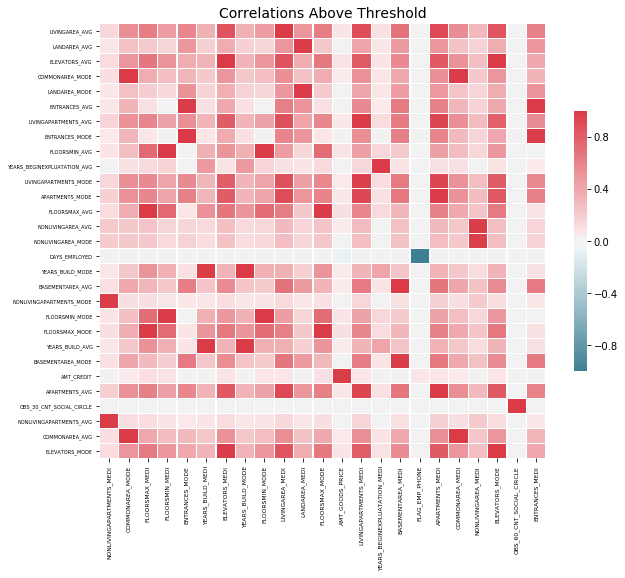

In [13]:
fs_instance.identify_collinear(correlation_threshold=0.975)
fs_instance.plot_collinear()

随后我们用 LightGBM 快速跑一个简易的baseline，这里需要注意所有的类别变量，会被做 one hot encoding

In [16]:
fs_instance.identify_zero_importance(task='classification', eval_metric='auc', n_iterations=3, early_stopping=True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[297]	valid_0's auc: 0.763132
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[409]	valid_0's auc: 0.756853
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[576]	valid_0's auc: 0.756896

24 features with zero importance after one-hot encoding.



There are 121 original features
There are 140 one hotencoded features


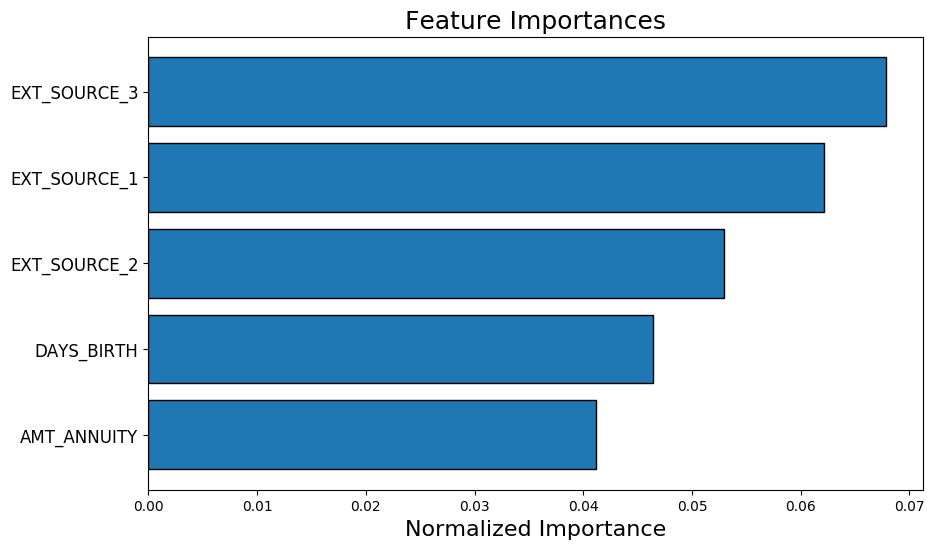

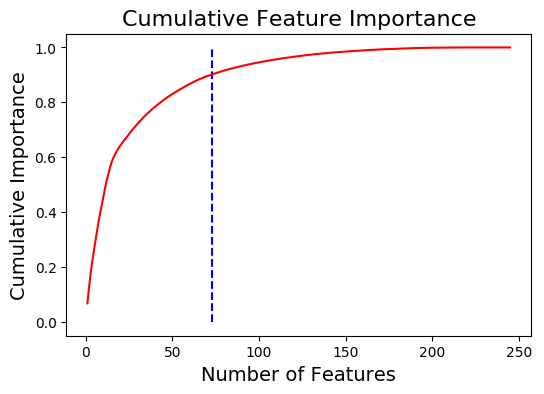

73 features required for 0.90 of cumulative importance


In [26]:
one_hot_features = fs_instance.one_hot_features
base_features = fs_instance.base_features
print('There are {} original features'.format(len(base_features)))
print('There are {} one hotencoded features'.format(len(one_hot_features)))
fs_instance.plot_feature_importances(threshold=0.9, plot_n=5)